<a href="https://colab.research.google.com/github/Supriyo-I/LGMVIP-DataScience-Task-2/blob/main/stockmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [109]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.utils.vis_utils import plot_model

In [99]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)
training_set = df.iloc[:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
  np.append(X_train,training_set_scaled[i-60:i, 0])
  np.append(y_train,training_set_scaled[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[-1], 1))

In [ ]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (2035, 8)
Null Value Present:  False


<Axes: >

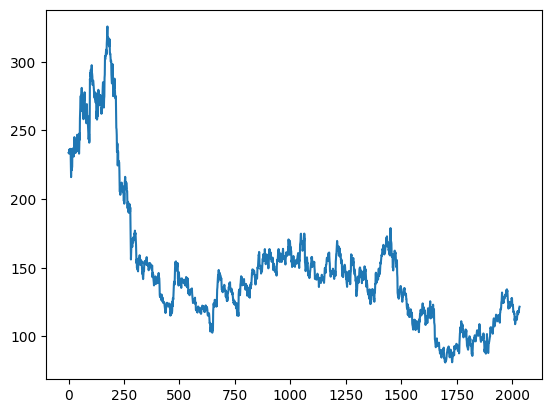

In [ ]:
df['Close'].plot()

In [100]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low','Total Trade Quantity']

In [101]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index= df.index)
feature_transform.head()

,Open,High,Low,Total Trade Quantity
0,0.620235,0.622688,0.621560,0.103951
1,0.622263,0.626144,0.625285,0.173002
2,0.644363,0.639154,0.631078,0.075513
3,0.617194,0.625940,0.629009,0.079233
4,0.618208,0.635902,0.623836,0.116080


In [105]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [106]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

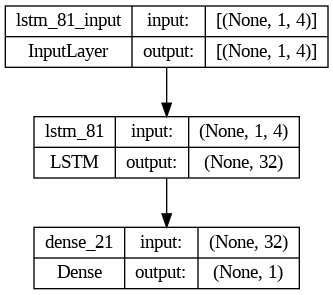

In [110]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [111]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 2s 2ms/step - loss: 25801.2148
Epoch 2/100
232/232 [==============================] - 1s 3ms/step - loss: 24825.5625
Epoch 3/100
232/232 [==============================] - 1s 2ms/step - loss: 22043.4668
Epoch 4/100
232/232 [==============================] - 1s 2ms/step - loss: 17601.8711
Epoch 5/100
232/232 [==============================] - 1s 2ms/step - loss: 12521.1279
Epoch 6/100
232/232 [==============================] - 1s 2ms/step - loss: 7919.5947
Epoch 7/100
232/232 [==============================] - 1s 2ms/step - loss: 4409.6001
Epoch 8/100
232/232 [==============================] - 1s 2ms/step - loss: 2131.3633
Epoch 9/100
232/232 [==============================] - 1s 2ms/step - loss: 890.9501
Epoch 10/100
232/232 [==============================] - 1s 2ms/step - loss: 335.6313
Epoch 11/100
232/232 [==============================] - 1s 3ms/step - loss: 133.0885
Epoch 12/100
232/232 [==============================] - 1s 3m

In [112]:
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 3ms/step


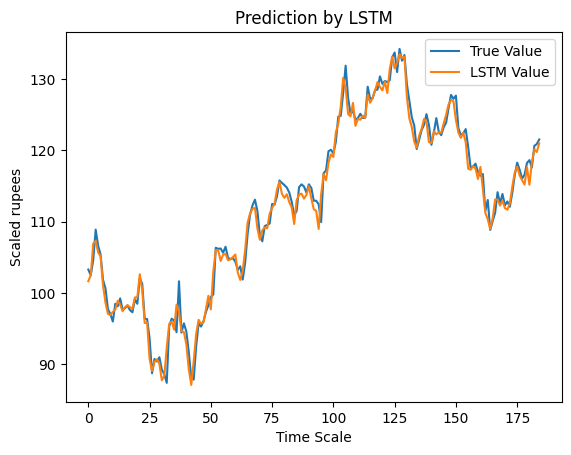

In [114]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled rupees')
plt.legend()
plt.show()